<h1 align="center">  Analysis Of Fraud Detection In The Financial Payment Services </h1>  
<h6 align="right" > Med Amine LAHYANI </h6>
</br>


## 1. Importing packages

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## 2. Load Datasets

In [2]:
fraud= pd.read_csv("C:/Users/lahya/Workplace/archive/Fraud.csv")
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 3. Data Pre-processing

In [4]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
fraud.isnull().mean()

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2278462c310>,
 'caps': [<matplotlib.lines.Line2D at 0x2278462c970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2278462c040>],
 'medians': [<matplotlib.lines.Line2D at 0x2278462ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2278463f160>],
 'means': []}

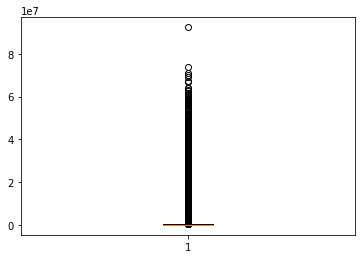

In [6]:
plt.boxplot(fraud['amount'])

In [7]:
fraud.drop(fraud[fraud['amount']>=80000000].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x227865bb1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x227865bb790>,
 'boxes': [<matplotlib.lines.Line2D at 0x227865a9ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x227865bbd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x227865c7040>],
 'means': []}

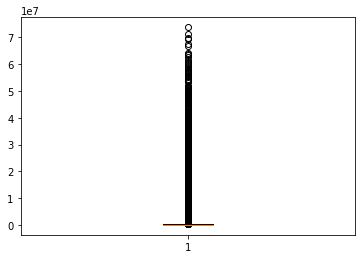

In [8]:
plt.boxplot(fraud['amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227868c29a0>,
 'caps': [<matplotlib.lines.Line2D at 0x227868c2f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x227868c26d0>],
 'medians': [<matplotlib.lines.Line2D at 0x227868d3520>],
 'fliers': [<matplotlib.lines.Line2D at 0x227868d37f0>],
 'means': []}

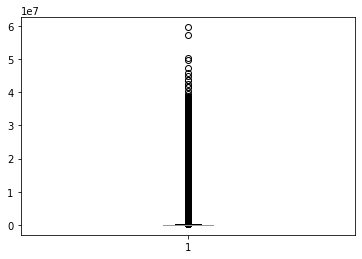

In [9]:
plt.boxplot(fraud['oldbalanceOrg'])

In [10]:
fraud.drop(fraud[fraud['oldbalanceOrg']>=50000000].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x22786936cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x227869442b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22786936a00>],
 'medians': [<matplotlib.lines.Line2D at 0x227869447c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22786944a90>],
 'means': []}

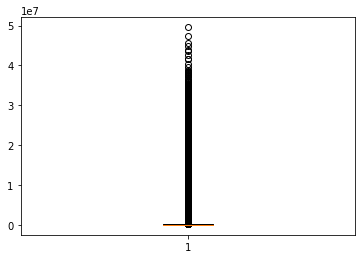

In [11]:
plt.boxplot(fraud['oldbalanceOrg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22786996fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x227869a6580>,
 'boxes': [<matplotlib.lines.Line2D at 0x22786996cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x227869a6b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x227869a6df0>],
 'means': []}

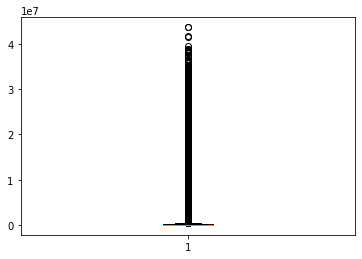

In [12]:
plt.boxplot(fraud['newbalanceOrig'])

In [13]:
fraud.drop(fraud[fraud['newbalanceOrig']>=40000000].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x227869f9f70>,
 'caps': [<matplotlib.lines.Line2D at 0x22786a08550>,
 'boxes': [<matplotlib.lines.Line2D at 0x227869f9ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x22786a08af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22786a08dc0>],
 'means': []}

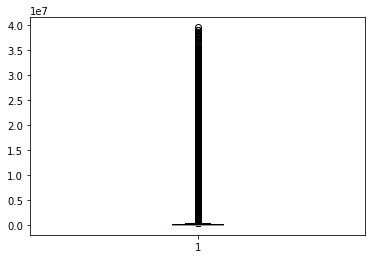

In [14]:
plt.boxplot(fraud['newbalanceOrig'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22786a751c0>,
 'caps': [<matplotlib.lines.Line2D at 0x22786a75760>,
 'boxes': [<matplotlib.lines.Line2D at 0x22786a63eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x22786a75d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22786a75fd0>],
 'means': []}

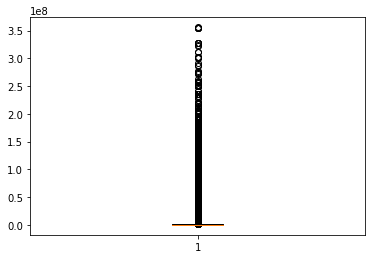

In [15]:
plt.boxplot(fraud['oldbalanceDest'])

In [16]:
fraud.drop(fraud[fraud['oldbalanceDest']>30000000].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x227872fa580>,
 'caps': [<matplotlib.lines.Line2D at 0x227872fab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x227872fa2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22787307100>],
 'fliers': [<matplotlib.lines.Line2D at 0x227873073d0>],
 'means': []}

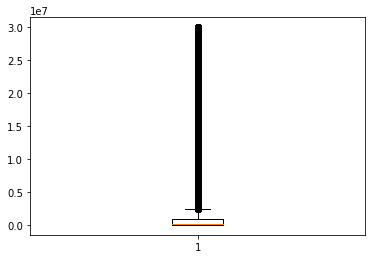

In [17]:
plt.boxplot(fraud['oldbalanceDest'])

{'whiskers': [<matplotlib.lines.Line2D at 0x227873670a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22787367640>,
 'boxes': [<matplotlib.lines.Line2D at 0x22787356d90>],
 'medians': [<matplotlib.lines.Line2D at 0x22787367be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22787367eb0>],
 'means': []}

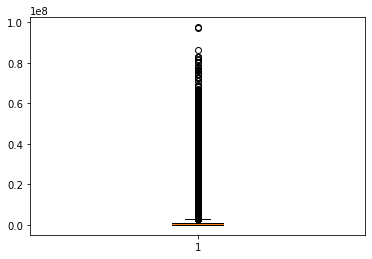

In [18]:
plt.boxplot(fraud['newbalanceDest'])

In [19]:
fraud.drop(fraud[fraud['newbalanceDest']>9000000].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x227873c31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x227873c3790>,
 'boxes': [<matplotlib.lines.Line2D at 0x227873b5ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x227873c3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x227873cf040>],
 'means': []}

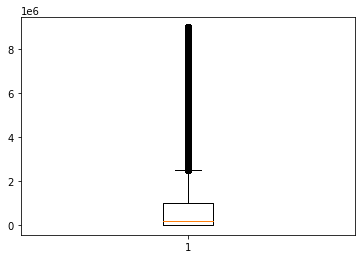

In [20]:
plt.boxplot(fraud['newbalanceDest'])

In [35]:
new_fraud=fraud[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]
new_fraud.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0
2,181.00,181.0,0.00,0.0,0.0,1
3,181.00,181.0,0.00,21182.0,0.0,1
4,11668.14,41554.0,29885.86,0.0,0.0,0


In [36]:
    new_fraud.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.217074e+06,6.217074e+06,6.217074e+06,6.217074e+06,6.217074e+06,6.217074e+06
mean,1.560591e+05,8.246549e+05,8.459641e+05,7.637862e+05,8.571020e+05,1.271659e-03
std,2.932292e+05,2.872096e+06,2.907951e+06,1.422832e+06,1.503246e+06,3.563765e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.299927e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.142788e+04,1.455100e+04,0.000000e+00,1.111819e+05,1.929646e+05,0.000000e+00
75%,2.041877e+05,1.070790e+05,1.438934e+05,8.438473e+05,1.002353e+06,0.000000e+00
max,1.000000e+07,4.958504e+07,3.958504e+07,1.306083e+07,8.999991e+06,1.000000e+00


## 4. Predictive Analysis [Regression Models]

In [37]:
#échantillonnage
import numpy as np
data_size=fraud.shape[0]
sample =np.random.randint(data_size,size=int(data_size*0.01))
data=new_fraud.iloc[sample]
data.shape

(62170, 6)

In [38]:
x=data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=data['isFraud']

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8, random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(49736, 5) (12434, 5) (49736,) (12434,)


Classification with the KNN neighbors algorithm

Hyperparameter tuning

In [66]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)

0.9991153289367862

In [43]:
val_score=[]
for k in range(2,15):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    val_score.append(100*model.score(x_test,y_test))


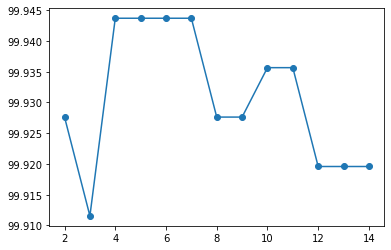

In [44]:
plt.plot(range(2,15),val_score,'o-')

In [63]:
KNN = KNeighborsClassifier(n_neighbors=)

0.9994370275052276

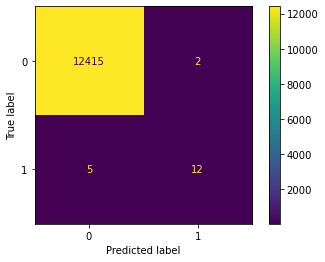

In [64]:
plot_confusion_matrix(KNN, x_test, y_test)
plt.show()

In [67]:
print(classification_report(y_test,KNN.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12417
           1       0.67      0.71      0.69        17

    accuracy                           1.00     12434
   macro avg       0.83      0.85      0.84     12434
weighted avg       1.00      1.00      1.00     12434



Decision Tree

In [49]:
Arbre=DecisionTreeClassifier(random_state=25, max_depth=5)
Arbre.fit(x_train,y_train,sample_weight=None,check_input=True)
Arbre.score(x_test,y_test)

0.9995978767894483

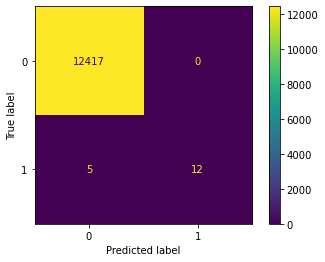

In [60]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Arbre, x_test, y_test)
plt.show()

In [51]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Arbre.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12417
           1       1.00      0.71      0.83        17

    accuracy                           1.00     12434
   macro avg       1.00      0.85      0.91     12434
weighted avg       1.00      1.00      1.00     12434



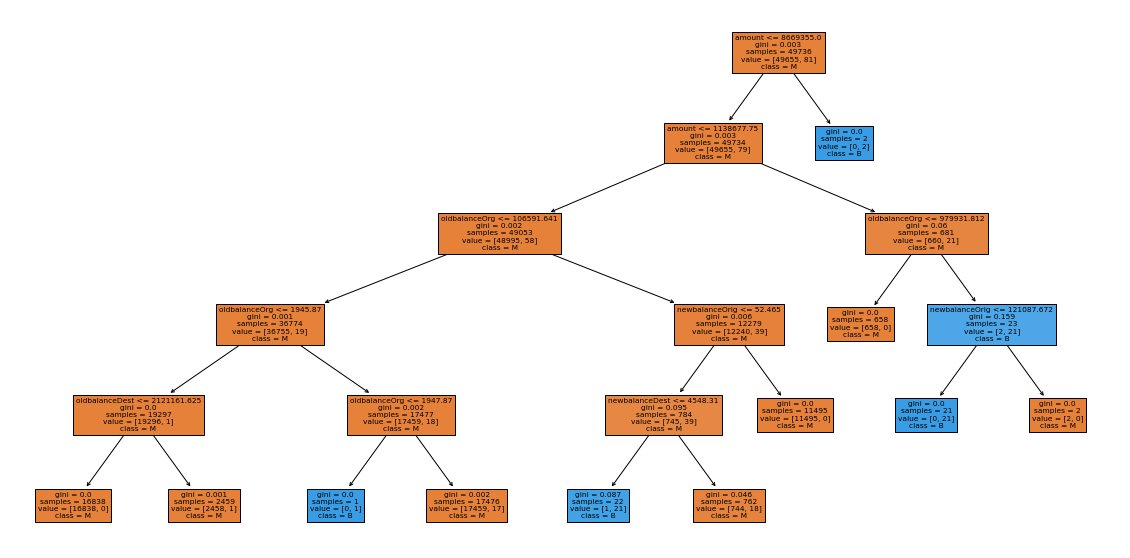

In [52]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(Arbre, feature_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],class_names=['M','B'], filled=True)
plt.show()

Logistic Regression

In [58]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [59]:
LR.score(x_test,y_test)

0.9991153289367862

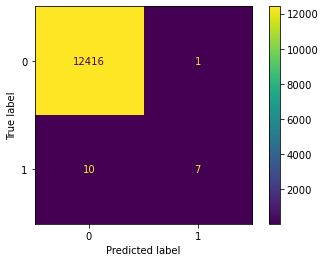

In [61]:
plot_confusion_matrix(LR, x_test, y_test)
plt.show()

In [68]:
print(classification_report(y_test,LR.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12417
           1       0.88      0.41      0.56        17

    accuracy                           1.00     12434
   macro avg       0.94      0.71      0.78     12434
weighted avg       1.00      1.00      1.00     12434



                 val     Score
0                 LR  0.999115
1                KNN  0.999115
2  Arbre de décision  0.999598


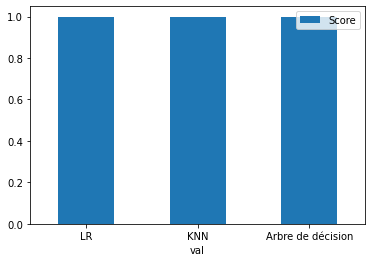

In [87]:
#Comparaison 
Score=[LR.score(x_test,y_test),KNN.score(x_test,y_test),Arbre.score(x_test,y_test)]
df=pd.DataFrame({'val':['LR','KNN','Arbre de décision'],'Score':Score})
df.plot.bar(x='val',y='Score',rot=0)
print(df)